# Predicción de Potabilidad del Agua

En esta ocasión se busca desarrollar un proceso de búsqueda de hiperparámetros para un modelo de Máquina de Soporte Vectorial (SVM).

Se sugiere fuertemente leer la documentación entregada en los artículos de los links.

Debe completar las celdas vacías y seguir las instrucciones anotadas en el cuaderno. La fecha límite de entrega es el día **22 de noviembre** y se realizará a través de Bloque Neón.

In [1]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.preprocessing import OrdinalEncoder, MinMaxScaler, RobustScaler
import matplotlib.pyplot as plt

Lectura de CSV y borrado de filas incompletas.

In [2]:
df = pd.read_csv('waterPotability/water_potability.csv').dropna()
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
5,5.584087,188.313324,28748.687739,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708,0
6,10.223862,248.071735,28749.716544,7.513408,393.663396,283.651634,13.789695,84.603556,2.672989,0
7,8.635849,203.361523,13672.091764,4.563009,303.309771,474.607645,12.363817,62.798309,4.401425,0


Gráfica de proporción de clases. A continuación puede observar una desproporción entre los datos, por lo que se está lidiando con un problema desbalanceado.

<AxesSubplot:ylabel='Potability'>

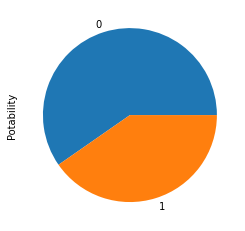

In [3]:
df['Potability'].value_counts().plot(kind='pie')

### Manejo de Datos Desbalanceados: Remuestreo

In [4]:
from sklearn.utils import resample
from sklearn.utils import shuffle

zero  = df[df['Potability']==0]   # clase 0
one = df[df['Potability']==1]  # clase 1

df_minority_upsampled = resample(one, replace = True, n_samples = 1200)
df = pd.concat([zero, df_minority_upsampled])

df = shuffle(df) # shuffling so that there is particular sequence

<AxesSubplot:ylabel='Potability'>

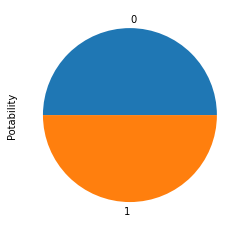

In [5]:
df['Potability'].value_counts().plot(kind='pie')

In [6]:
X = df.drop(['Potability'], axis = 1)
y = df['Potability']

In [7]:
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

### Separación en Conjuntos de Validación/Prueba

Separe los datos (`X` y `y`) en conjuntos de:

- Entrenamiento (70%)
- Validación (15%)
- Prueba (15%)

Utilizando `train_test_split`.

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=49)
X_valid, X_test, y_valid, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=49)

## Parte 1: Evaluación de Modelos y GridSearch

Como recordará, en la tarea anterior se realizó un proceso de GridSearch y RandomizedSearch. En esta ocasión, nuevamente implementará este procedimiento para encontrar los mejores hiperparámetros.

Esta vez, se le solicita **desarrollar cada uno de los casos de forma manual y sin utilizar la librería SciKit-Learn (utilice ciclos `for`), obtener los mejores parámetros para los datos de VALIDACIÓN y graficar el histórico para los rangos del parámetro de regularización.**

- Kernel: Lineal, Polinomial (utilizar grados 1, 2, 3 y 4), Función Base Radial (RBF), Sigmoide.
- Parámetro de Regularización: Recorrido en escala logarítmica desde $10^{-3}$ hasta $10^{5}$.

Utilice la función `SVC` de `sklearn.svm` para definir y ajustar cada modelo.

### Búsqueda de Hiperparámetros con GridSearch

#### Caso 1: Kernel Lineal

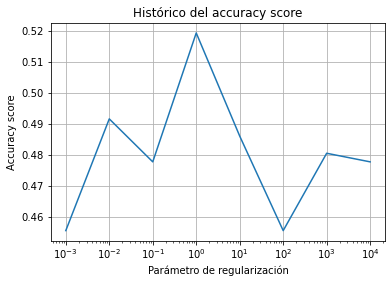

In [9]:
from sklearn import svm
from sklearn.metrics import accuracy_score

regularizacion = [10**-3, 10**-2, 10**-1, 1, 10, 100, 1000, 10**4]

accuracies_lin = []
for regu in regularizacion:
    clasificador = svm.SVC(C=regu, kernel='linear')
    clasificador.fit(X_train, y_train)

    # Predicciones
    y_pred = clasificador.predict(X_valid)
    accuracy = accuracy_score(y_valid, y_pred)

    accuracies_lin.append(accuracy)


plt.plot(regularizacion, accuracies_lin)
plt.grid()
plt.title('Histórico del accuracy score')
plt.xlabel('Parámetro de regularización')
plt.ylabel('Accuracy score')
plt.xscale(value='log')

#### Caso 2: Kernel Polinomial

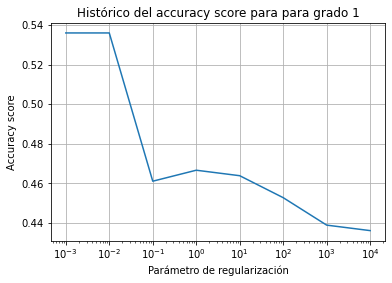

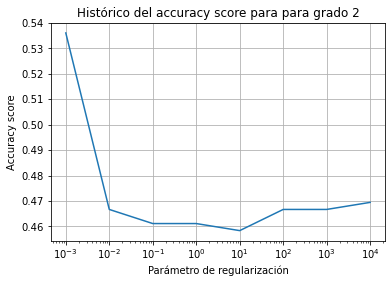

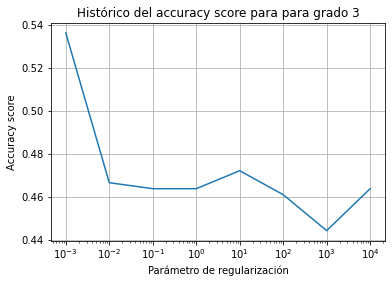

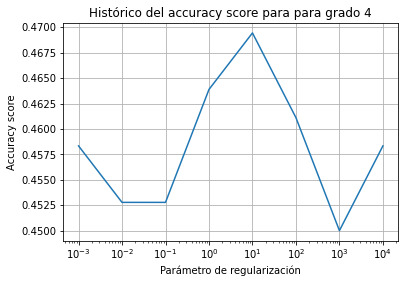

In [10]:
grados = [1, 2, 3, 4]

accuracies_poly = []
for grado in grados:
    for regu in regularizacion:
        clasif = svm.SVC(C=regu, kernel='poly', degree=grado)
        clasif.fit(X_train, y_train)

        # Predicciones
        y_pred = clasif.predict(X_valid)
        accuracy_poly = accuracy_score(y_valid, y_pred)

        accuracies_poly.append(accuracy_poly)

    plt.figure()
    plt.plot(regularizacion, accuracies_poly)
    plt.grid()
    plt.title(f'Histórico del accuracy score para para grado {grado}')
    plt.xlabel('Parámetro de regularización')
    plt.ylabel('Accuracy score')
    plt.xscale(value='log')

    accuracies_poly = []

#### Caso 3: Función Base Radial

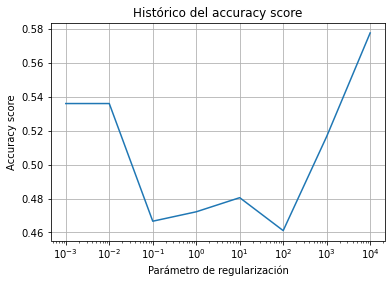

In [11]:
accuracies_radial = []
for regu in regularizacion:
    clasificador = svm.SVC(C=regu, kernel='rbf')
    clasificador.fit(X_train, y_train)

    # Predicciones
    y_pred = clasificador.predict(X_valid)
    accuracy = accuracy_score(y_valid, y_pred)

    accuracies_radial.append(accuracy)
    
plt.plot(regularizacion, accuracies_radial)
plt.grid()
plt.title('Histórico del accuracy score')
plt.xlabel('Parámetro de regularización')
plt.ylabel('Accuracy score')
plt.xscale(value='log')

#### Caso 4: Kernel Sigmoide

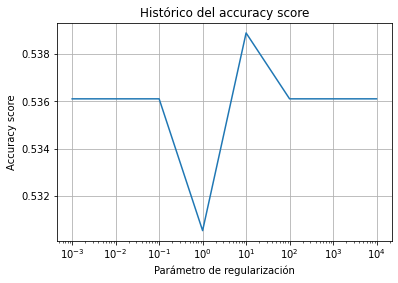

In [12]:
accuracies_sigmoid = []
for regu in regularizacion:
    clasificador = svm.SVC(C=regu, kernel='sigmoid')
    clasificador.fit(X_train, y_train)

    # Predicciones
    y_pred = clasificador.predict(X_valid)
    accuracy = accuracy_score(y_valid, y_pred)

    accuracies_sigmoid.append(accuracy)
    
plt.plot(regularizacion, accuracies_sigmoid)
plt.grid()
plt.title('Histórico del accuracy score')
plt.xlabel('Parámetro de regularización')
plt.ylabel('Accuracy score')
plt.xscale(value='log')

## Parte 2: Análisis de Resultados

Ahora, basado en los resultados anteriores, obtenga una evaluación final del mejor modelo y concluya sobre la pertinencia del mismo dentro del contexto de este problema.

In [13]:
from sklearn.metrics import classification_report

best_classifier = SVC(C=10**4, kernel='rbf')# #, degree=# En caso de utilizar un Kernel polinomial #) # Parámetros del clasificador #
best_classifier.fit(X_train, y_train)    

y_pred_rf = best_classifier.predict(X_test)

# Evaluación
print(f"Best classifier: {accuracy_score(y_test,y_pred_rf)}")
print(f"Reporte de Clasificación:\n{classification_report(y_test, y_pred_rf)}")

Best classifier: 0.55
Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.59      0.55      0.57       196
           1       0.51      0.55      0.53       164

    accuracy                           0.55       360
   macro avg       0.55      0.55      0.55       360
weighted avg       0.55      0.55      0.55       360



## Conclusiones